In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

## Data Description

For this project we will be exploring publicly available data from LendingClub. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.
Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Expolatory Data Analysis

Text(0.5, 0, 'FICO')

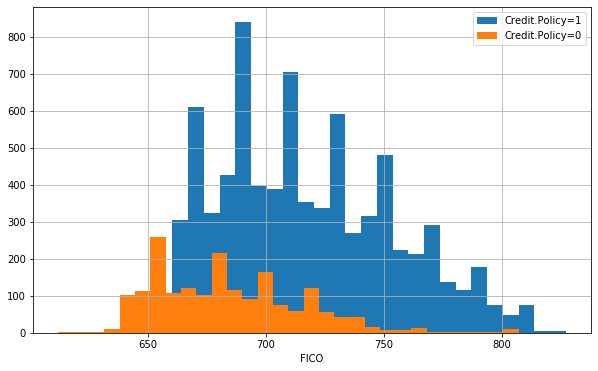

In [22]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

#### The figure above shows that the borrowers who had high FICO score often meet the credit policy of Lending.com(Credit.Policy=1) while the users with low FICO score do not meet the credit policy(Credit.Policy=1)

Text(0.5, 0, 'FICO')

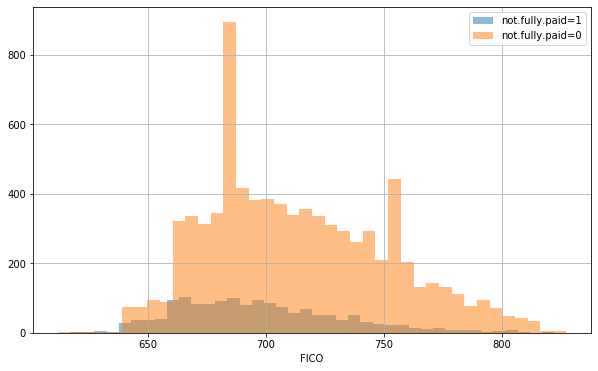

In [35]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=40,alpha=0.5,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(bins=40,alpha=0.5,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

#### The above figure plots the settlement of credit by borrowers with their FICO score. The graph shows that the borrowers with high FICO score usually paid off their credit fully when compared to borrowers with low FICO score

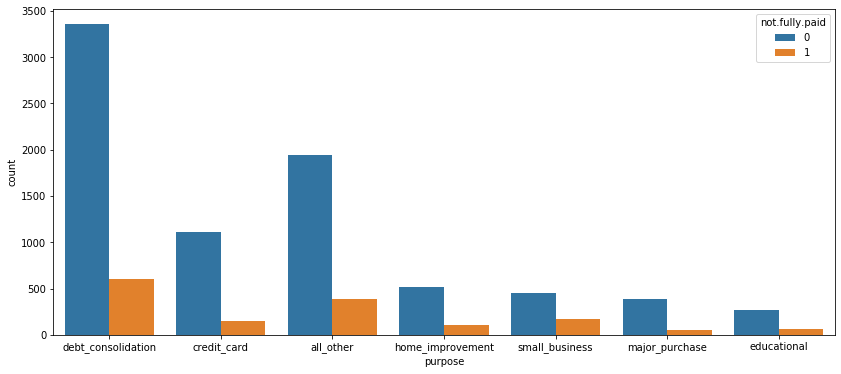

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(loans['purpose'],hue=loans['not.fully.paid'])

#### The above figure plots the purpose of the credit with the full payment by the borrowers. Grouping borrowers with the purpose of the credit gives a better understanding of the borrowers of each sector. This group shows many users borrow money for the purpose of 'debt_consolidation' when comparing to other section. Additionally we can also get the ratio of borrowers who paid fully with the borrowers who didn't pay fully in each section


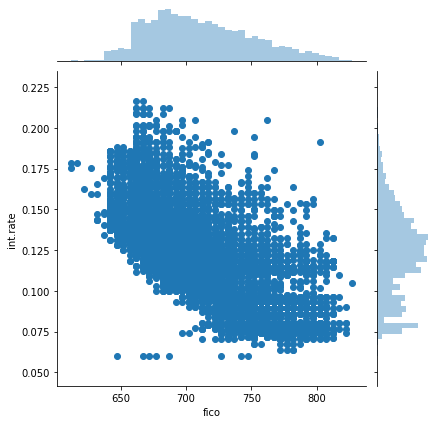

In [28]:
sns.jointplot('fico','int.rate',data=loans)

#### This graph shows the relationship between 'fico' and 'interest rate(int.rate)'. The graph is leniarly decreasing which means when the FICO score increases the intrerest rate is reduces

<Figure size 720x432 with 0 Axes>

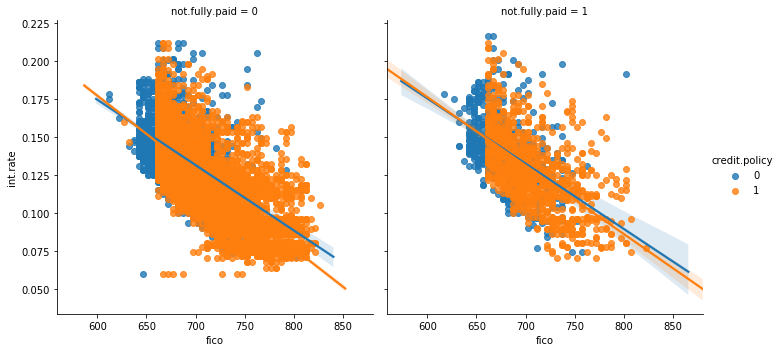

In [34]:
plt.figure(figsize=(10,6))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid')

## Data encoding for categorical values

In order to apply any sklearn model to our dataset we must convert all the columns into numerical data(int & float). On analysing our data we know that we have one column of type 'object' which is the 'purpose' column. So we will be converting this column to number using pd.get_dummies function

In [36]:
loans['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

The total number of categories in the column are listed above

In [40]:
loans_enc = pd.get_dummies(loans,drop_first=True)

In [41]:
loans_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [48]:
loans_enc.iloc[:,13:].head(5),loans['purpose'].head(5)

(   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
 0                    0                           1                    0   
 1                    1                           0                    0   
 2                    0                           1                    0   
 3                    0                           1                    0   
 4                    1                           0                    0   
 
    purpose_home_improvement  purpose_major_purchase  purpose_small_business  
 0                         0                       0                       0  
 1                         0                       0                       0  
 2                         0                       0                       0  
 3                         0                       0                       0  
 4                         0                       0                       0  ,
 0    debt_consolidation
 1           credit_card
 2    debt_consol

The updated dataframe shows that we no longer have any column of type 'object'. The dummies function converted the original 'purpose' column into 7 different columns, one column for every category. 

In [50]:
X_train,X_test,y_train,y_test = train_test_split(loans_enc.drop('not.fully.paid',axis=1),loans_enc['not.fully.paid'],test_size=0.3,
                                                 random_state=30)

In [52]:
dtree_model = DecisionTreeClassifier()

In [54]:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
y_pred = dtree_model.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2395
           1       0.22      0.24      0.23       479

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.73      2874



In [59]:
randomForest_model = RandomForestClassifier()

In [60]:
randomForest_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
y_predRf=randomForest_model.predict(X_test)

In [62]:
print(classification_report(y_test,y_predRf))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2395
           1       0.41      0.05      0.09       479

    accuracy                           0.83      2874
   macro avg       0.62      0.52      0.50      2874
weighted avg       0.77      0.83      0.77      2874



On comparing both the models we can clearly see the accuracy of RandomForest Classifier(0.83) is better than a normal decision tree classifier(0.73)